In [1]:
# imports

import numpy as np
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn import neighbors
import matplotlib.pyplot as plt
import numpy as np

In /home/emilio/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/emilio/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/emilio/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/emilio/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/emilio/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

In [2]:
from machine_learning.dataset.dataset_2200 import dataset

In [3]:
print(len(dataset))
dataset_size = len(dataset)

1552


In [4]:
def acc(y, yhat):
    return np.mean((y-yhat)**2)

In [5]:
def L1loss(y, yhat):
    return np.mean(np.abs((y-yhat)))

In [6]:
def loss(y, yhat):
    return np.sqrt(np.mean((y-yhat)**2))

In [7]:
def separates(sep_point):
    if sep_point == 1.0:
        return 0
    else:
        return 1

In [8]:
clean_X = np.array(list(map(lambda x: [x[1], x[2]], dataset)))

In [9]:
clean_y = np.array(list(map(lambda x: x[6], dataset)))

k-folding XGBOOST:

In [10]:
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
loss_accum = 0
class_loss_accum = 0
for train_index, test_index in kf.split(clean_X, clean_y):
    X_train, X_test = clean_X[train_index], clean_X[test_index]
    y_train, y_test = clean_y[train_index], clean_y[test_index]
    y_train_sep = np.array(list(map(separates, y_train)))
    y_test_sep = np.array(list(map(separates, y_test)))
    xgb_model = xgb.XGBRegressor(n_estimators=1000, max_depth=28, eta=0.01, subsample=1, colsample_bytree=1)
    xgb_model.fit(X_train, y_train)
    xgb_classify_model = xgb.XGBClassifier(n_estimators=1000, max_depth=28, eta=0.01, subsample=1, colsample_bytree=1)
    xgb_classify_model.fit(X_train, y_train_sep)
    y_hat = xgb_model.predict(X_test)
    y_hat_classify = xgb_classify_model.predict(X_test)
    print(y_hat_classify)
    print(y_test_sep)
    print(y_test_sep.shape)
    l = loss(y_hat, y_test)
    l_class = acc(y_hat_classify, y_test_sep)
    loss_accum += l
    class_loss_accum += l_class
print("K-fold regression loss: " + str(loss_accum/n_folds))
print("K-fold classific loss: " + str(class_loss_accum/n_folds))
print("Dataset size: " + str(dataset_size))

[08:38:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1]
[1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1

In [11]:
n_folds = 3
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
loss_accum = 0
class_loss_accum = 0
n_neighbors = 400
for train_index, test_index in kf.split(clean_X, clean_y):
    X_train, X_test = clean_X[train_index], clean_X[test_index]
    y_train, y_test = clean_y[train_index], clean_y[test_index]
    y_train_sep = np.array(list(map(separates, y_train)))
    y_test_sep = np.array(list(map(separates, y_test)))
    knn_regression_model = neighbors.KNeighborsRegressor(n_neighbors)
    knn_regression_model.fit(X_train, y_train)
    knn_classifier_model = neighbors.KNeighborsClassifier(n_neighbors)
    knn_classifier_model.fit(X_train, y_train_sep)
    y_hat = (knn_regression_model.predict(X_test)).reshape(-1, 1)
    y_hat_classify = (knn_classifier_model.predict(X_test)).reshape(-1, 1)
    l = loss(y_hat, y_test)
    l_class = loss(y_hat_classify, y_test_sep)
    loss_accum += l
    class_loss_accum += l_class
print("K-fold regression loss: " + str(loss_accum/n_folds))
print("K-fold classific loss: " + str(class_loss_accum/n_folds))
print("Dataset size: " + str(dataset_size))

K-fold regression loss: 0.2807442055030601
K-fold classific loss: 0.3543139600461545
Dataset size: 1552


Visualize obtained field

0.7541772951737443


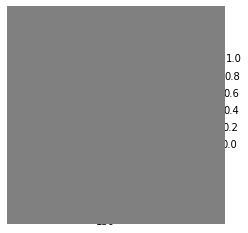

In [12]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D


xvalues, yvalues = meshgrid(arange(0, 20, 0.1), arange(0, 20, 0.1))
vals = np.array(np.meshgrid(arange(0, 20, 0.1), arange(0, 20, 0.1))).reshape(-1,2)
zvalues = sin(sqrt(xvalues**2 + yvalues**2))#xgb_model.predict(vals)
ax = gca(projection='3d')
zvalues = zvalues.reshape(xvalues.shape)
#ax.plot_surface(xvalues, yvalues, zvalues)
print(zvalues[3, 8])
plt.imshow(zvalues, cmap='gray', vmin=-1.1, vmax=1.1, aspect='auto')
#cp = contour(xvalues, yvalues, zvalues)
#clabel(cp)
#show()

In [13]:
train_X, test_X, train_y, test_y = train_test_split(clean_X, clean_y, test_size=0.20, random_state=42)

In [14]:
train_X_0, train_X_1, train_y_0, train_y_1 = train_test_split(train_X, train_y, test_size = 0.005)

In [15]:
train_y_sep = np.array(list(map(separates, train_y_0)))
test_y_sep = np.array(list(map(separates, test_y)))

In [16]:
train_y_sep

array([0, 1, 1, ..., 1, 1, 1])

In [17]:
# Quick baseline

xgb_model = xgb.XGBRegressor(n_estimators=1000, max_depth=28, eta=0.01, subsample=1, colsample_bytree=1)
xgb_classify_model = xgb.XGBClassifier(n_estimators=8000, max_depth=18, eta=0.1, subsample=1, colsample_bytree=1)


In [18]:
train_y_sep

array([0, 1, 1, ..., 1, 1, 1])

In [19]:
xgb_model.fit(train_X_0, train_y_0)
xgb_classify_model.fit(train_X_0, train_y_sep)

[08:38:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(eta=0.1, max_depth=18, n_estimators=8000)

In [20]:
y_hat = xgb_model.predict(test_X)
y_hat_sep = xgb_classify_model.predict(test_X)

In [21]:
y_hat_sep

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [22]:
loss(y_hat, test_y)

0.03322962541547726

In [23]:
loss(y_hat_sep, test_y_sep)

0.1603853879529251

In [24]:
test_y_sep

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [25]:
y_hat_sep

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [26]:
# Let's give it an extra boost



In [27]:
feat_1 = list(map(lambda x: x[0], train_X_0 ))
feat_2 = list(map(lambda x: x[1], train_X_0 ))
color = train_y_sep

In [28]:
def get_color(y):
    if y>0.98:
        return 0.0
    else:
        return y

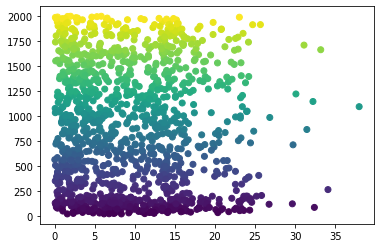

In [29]:
plt.scatter(feat_1, feat_2, c=feat_2)

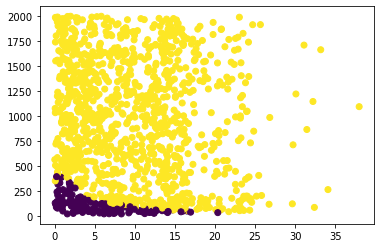

In [30]:
plt.scatter(feat_1, feat_2, c=color)

In [31]:
############### Let's build a Neural Network model next

In [32]:
train_X[3]

array([   1.57565921, 1125.06674763])

In [33]:
aoa_mean = np.mean(list(map(lambda x: x[0], train_X_0)))
re_mean = np.mean(list(map(lambda x: x[1], train_X_0)))
aoa_std = np.std(list(map(lambda x: x[0], train_X_0)))
re_std = np.std(list(map(lambda x: x[1], train_X_0)))

In [34]:
def scale(arr, mean, std):
    return (arr - mean) / std
    
def unscale(arr, mean, std):
    return (arr * std) + mean

In [35]:
normalized_aoa = scale(list(map(lambda x: x[0], train_X_0)), aoa_mean, aoa_std)

In [36]:
np.std(normalized_aoa)

1.0000000000000002

In [37]:
np.std(unscale(normalized_aoa, aoa_mean, aoa_std))

6.710903645475245

In [38]:
normalized_re = scale(list(map(lambda x: x[1], train_X_0)), re_mean, re_std)

In [39]:
normalized_train_X_0 = np.array(list(zip(normalized_aoa, normalized_re)))

In [40]:
def normalize_input_data(data, aoa_mean=None, aoa_std=None, re_mean=None, re_std=None):
    if aoa_mean == None:
        aoa_mean = np.mean(list(map(lambda x: x[0], data)))
    if re_mean == None:
        re_mean = np.mean(list(map(lambda x: x[1], data)))
    if aoa_std == None:
        aoa_std = np.std(list(map(lambda x: x[0], data)))
    if re_std == None:
        re_std = np.std(list(map(lambda x: x[1], data)))
    normalized_aoa = scale(list(map(lambda x: x[0], data)), aoa_mean, aoa_std)
    normalized_re = scale(list(map(lambda x: x[1], data)), re_mean, re_std)
    return np.array(list(zip(normalized_aoa, normalized_re)))

In [41]:
normalized_train_X_0 = normalize_input_data(train_X_0)
normalized_test_X = normalize_input_data(test_X, aoa_mean, aoa_std, re_mean, re_std)

In [42]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

import keras
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Softmax



Using TensorFlow backend.
/home/emilio/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/emilio/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/emilio/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/emilio/.local/lib/python3.6/site-packages/tensorflow/python

In [43]:
from keras.utils.vis_utils import plot_model

In [44]:
n_folds = 2
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
loss_accum = 0
class_loss_accum = 0
n_neighbors = 400
for train_index, test_index in kf.split(clean_X, clean_y):
    
    nn_regression_model = Sequential()
    nn_regression_model.add(Dense(2, input_dim=2))
    nn_regression_model.add(Dense(6, activation='elu'))
    nn_regression_model.add(Dense(10, activation='elu'))
    nn_regression_model.add(Dense(4, activation='elu'))
    nn_regression_model.add(Dense(3, activation='elu'))
    nn_regression_model.add(Dense(2, activation='elu'))
    nn_regression_model.add(Dense(1))
    
    plot_model(nn_regression_model, show_shapes=True, show_layer_names=True)

    nn_classifier_model = Sequential()
    nn_classifier_model.add(Dense(2, input_dim=2))
    nn_classifier_model.add(Dense(6, activation='elu'))
    nn_classifier_model.add(Dense(10, activation='elu'))
    nn_classifier_model.add(Dense(4, activation='elu'))
    nn_classifier_model.add(Dense(3, activation='elu'))
    nn_classifier_model.add(Dense(2, activation='elu'))
    nn_classifier_model.add(Dense(1, activation='sigmoid'))

    optimizer = keras.optimizers.Adam(lr=0.008)
    nn_regression_model.compile(optimizer=optimizer, loss=root_mean_squared_error)

    nn_classifier_model.compile(optimizer=optimizer, loss='binary_crossentropy')

    X_train, X_test = clean_X[train_index], clean_X[test_index]
    y_train, y_test = clean_y[train_index], clean_y[test_index]
    y_train_sep = np.array(list(map(separates, y_train)))
    y_test_sep = np.array(list(map(separates, y_test)))
    
    aoa_mean = np.mean(list(map(lambda x: x[0], X_train)))
    re_mean = np.mean(list(map(lambda x: x[1], X_train)))
    aoa_std = np.std(list(map(lambda x: x[0], X_train)))
    re_std = np.std(list(map(lambda x: x[1], X_train)))
    
    normalized_X_train = normalize_input_data(X_train, aoa_mean, aoa_std, re_mean, re_std)
    normalized_X_test = normalize_input_data(X_test, aoa_mean, aoa_std, re_mean, re_std)
    
    history = nn_regression_model.fit(normalized_X_train, y_train, epochs=150, batch_size=16, validation_data=(normalized_X_test, y_test))
    history_class = nn_classifier_model.fit(normalized_X_train, y_train_sep, epochs=100, batch_size=16, validation_data=(normalized_X_test, y_test_sep))
    y_hat = nn_regression_model.predict(normalized_X_test)
    y_hat_classify = nn_classifier_model.predict(normalized_X_test)
    
    l = loss(y_hat, y_test.reshape(-1,1))
    l_class = loss(y_hat_classify, y_test_sep.reshape(-1, 1))
    print("reg loss: " + str(l))
    print("class loss: " + str(l_class))
    loss_accum += l
    class_loss_accum += l_class
print("K-fold regression loss: " + str(loss_accum/n_folds))
print("K-fold classific loss: " + str(class_loss_accum/n_folds))
print("Dataset size: " + str(dataset_size))

OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

In [42]:
history.history

{'val_loss': [0.10172293978658589,
  0.08380654934123591,
  0.05219785513885939,
  0.04680706803440125,
  0.0437651531161953,
  0.056957114260910324,
  0.04320194773246287,
  0.0399092276989549,
  0.03801450296890574,
  0.04493160222294944,
  0.0413821097787621,
  0.040714742532954686,
  0.040694218647722116,
  0.040490152663776445,
  0.03110548567091704,
  0.03806399524471285,
  0.06483387388649255,
  0.047510765363215475,
  0.02682803966090573,
  0.032480380366370805,
  0.0349878300363252,
  0.03804428256846373,
  0.04283330081538721,
  0.029637071168918443,
  0.025911407952324796,
  0.030800119049602136,
  0.035612819388479974,
  0.029641068599959637,
  0.03214107401222279,
  0.0279614850518436,
  0.027305152245600865,
  0.020131861210964636,
  0.030320060913175403,
  0.02804362413255458,
  0.03253070007094562,
  0.025563890323388738,
  0.025438454715495416,
  0.05013637420517794,
  0.02593384203960402,
  0.0267177556841355,
  0.028020004765265685,
  0.043560080702202235,
  0.017432

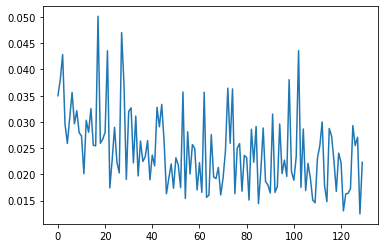

In [43]:
#plt.plot(history.history['loss'][20:])
plt.plot(history.history['val_loss'][20:])

Classification Boosting

In [274]:
# Now we combine the greater certainty of the classifier to fix regression 1's values

def boost_predictions(regression_preds, classification_preds, proba=0):
    #rmask = (np.random.uniform(0,1,regression_preds.shape[0])>=proba).astype(np.double).reshape(-1,1)
    #cpmask = 1.0 - rmask
    #r = (regression_preds - 1).reshape(-1,1)
    #q = np.multiply(r,classification_preds)
    #res = q + 1
    #return res
    #return regression_preds
    res = np.zeros(regression_preds.shape)
    for i in range(0, regression_preds.shape[0]):
        if(classification_preds[i] == 0 and regression_preds[i] > 0.95 and np.random.uniform()<proba):
            res[i]=1.0
        else:
            res[i]=regression_preds[i]
    return res.reshape(-1,1)
    #return np.multiply(regression_preds.reshape(-1, 1), rmask) + np.multiply(res, cpmask)

In [294]:
xgb_impr_acc = 0
nn_impr_acc = 0
knn_impr_acc = 0
n = 20
for i in range(0,n):
    X_train, X_test, y_train, y_test = train_test_split(clean_X, clean_y, test_size=0.2, random_state=242+10*i)
    
    y_train_sep = np.array(list(map(separates, y_train)))
    y_test_sep = np.array(list(map(separates, y_test)))
    
    xgb_model = xgb.XGBRegressor(n_estimators=1000, max_depth=28, eta=0.01, subsample=1, colsample_bytree=1)
    xgb_model.fit(X_train, y_train)
    xgb_classify_model = xgb.XGBClassifier(n_estimators=8000, max_depth=28, eta=0.01, subsample=1, colsample_bytree=1)
    xgb_classify_model.fit(X_train, y_train_sep)

    aoa_mean = np.mean(list(map(lambda x: x[0], X_train)))
    re_mean = np.mean(list(map(lambda x: x[1], X_train)))
    aoa_std = np.std(list(map(lambda x: x[0], X_train)))
    re_std = np.std(list(map(lambda x: x[1], X_train)))

    normalized_X_train = normalize_input_data(X_train, aoa_mean, aoa_std, re_mean, re_std)
    normalized_X_test = normalize_input_data(X_test, aoa_mean, aoa_std, re_mean, re_std)

    y_hat_sep = xgb_classify_model.predict(X_test)
    print("acc " + str(acc(y_hat_sep, y_test_sep))) # y_test and y_test_sep are ground truth

    xgb_y_hat = xgb_model.predict(X_test)
    nn_y_hat = nn_regression_model.predict(normalized_X_test)
    knn_y_hat = knn_regression_model.predict(X_test)
    
    #print(xgb_y_hat[0:40])
    #print(y_test[0:40])
    diff = 0
    oneerr = 0
    for j in range(0, y_test.shape[0]):
        diff += abs(xgb_y_hat[j]-y_test[j])
        #print("xbg : " + str(xgb_y_hat[j]))
        if(y_test[j]==1.0 and xgb_y_hat[j]!=1.0):
            oneerr += 1
    print(">>>>: " + str(diff) + ", oneerr: " + str(oneerr))
    
    
    
    xgb_p = L1loss(xgb_y_hat.reshape(-1,1), y_test.reshape(-1, 1))
    nn_p = L1loss(nn_y_hat, y_test.reshape(-1, 1))
    knn_p = L1loss(knn_y_hat, y_test.reshape(-1, 1))
    print("Base xgb performance: " + str(xgb_p))
    #print("Base nn performance: " + str(nn_p))
    #print("Base knn performance: " + str(knn_p))

    #print(xgb_y_hat.shape)
    #print(xgb_y_hat[0:40])
    #print(y_hat_sep[0:40])

    xgb_y_hat_boosted = boost_predictions(xgb_y_hat, y_hat_sep.reshape(-1,1), 1)
    nn_y_hat_boosted = boost_predictions(nn_y_hat, y_hat_sep.reshape(-1,1), 1)
    knn_y_hat_boosted = boost_predictions(knn_y_hat, y_hat_sep.reshape(-1,1), 1)
    

    diff = 0
    oneerr = 0
    for j in range(0, y_test.shape[0]):
        diff += abs(xgb_y_hat_boosted[j]-y_test[j])
        #print("xbg : " + str(xgb_y_hat[j]) + ", boosted: " + str(xgb_y_hat_boosted[j][0]))
        if(y_test[j]==1.0 and xgb_y_hat_boosted[j]!=1.0):
            oneerr += 1
        #if(xgb_y_hat[j] !=  xgb_y_hat_boosted[j]):
        #    print("was " + str(xgb_y_hat[j]) + ", became: " + str(xgb_y_hat_boosted[j]) + ", and is really: " + str(y_test[j]))
    print(str(i) + "   #####: " + str(diff) + ", oneerr: " + str(oneerr))
      
    xgb_b_p = L1loss(xgb_y_hat_boosted.reshape(-1,1), y_test.reshape(-1, 1))
    nn_b_p = L1loss(nn_y_hat_boosted, y_test.reshape(-1, 1))
    knn_b_p = L1loss(knn_y_hat_boosted, y_test.reshape(-1, 1))
    print("Boosted xgb performance: " + str(xgb_b_p))
    #print("Boosted nn performance: " + str(nn_b_p))
    #print("Boosted knn performance: " + str(knn_b_p))

    print("XGB improvement: " + str(100.0*((xgb_p - xgb_b_p)/xgb_p)))
    #print("NN performance: " + str(100.0*((nn_p - nn_b_p)/nn_p)))
    #print("KNN performance: " + str(100.0*((knn_p - knn_b_p)/knn_p)))
    
    xgb_impr_acc += 100.0*((xgb_p - xgb_b_p)/xgb_p)
    nn_impr_acc += 100.0*((nn_p - nn_b_p)/nn_p)
    knn_impr_acc += 100.0*((knn_p - knn_b_p)/knn_p)
    
    print(" ")
    print(" ")
    
print("Average xgb improvement: " + str(xgb_impr_acc/n))
#print("Average nn improvement: " + str(nn_impr_acc/n))
#print("Average knn improvement: " + str(knn_impr_acc/n))

[23:17:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
acc 0.00964630225080386
>>>>: 3.112484727912403, oneerr: 32
Base xgb performance: 0.010007989478818024
0   #####: [3.00243685], oneerr: 0
Boosted xgb performance: 0.009654137784815229
XGB improvement: 3.535692106308909
 
 
[23:17:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
acc 0.012861736334405145
>>>>: 3.8618948897444203, oneerr: 49
Base xgb performance: 0.01241766845576984
1   #####: [3.71021567], oneerr: 3
Boosted xgb performance: 0.011929953929032223
XGB improvement: 3.927585347239657
 
 
[23:17:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
acc 0.00964630225080386
>>>>: 3.119013103408237, oneerr: 47
Base xgb performance: 0.010028981039897866
2   #####: [2.93165633], oneerr: 5
Boosted xgb performance: 0.0094265

In [ ]:
percent_boost_improvement = (loss(y_hat, test_y)-loss(y_hat_boosted, test_y))/loss(y_hat, test_y)*100
print("Boost improvement: " + str(percent_boost_improvement) + " %")

Simplified stacking:

In [ ]:
# Let's build a new linear model (single)

In [334]:
X_train, X_test, y_train, y_test = train_test_split(clean_X, clean_y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=42)
       
xgb_model = xgb.XGBRegressor(n_estimators=1000, max_depth=28, eta=0.01, subsample=1, colsample_bytree=1)
xgb_model.fit(X_train, y_train)

nn_regression_model = Sequential()
nn_regression_model.add(Dense(2, input_dim=2))
nn_regression_model.add(Dense(6, activation='elu'))
nn_regression_model.add(Dense(10, activation='elu'))
nn_regression_model.add(Dense(4, activation='elu'))
nn_regression_model.add(Dense(3, activation='elu'))
nn_regression_model.add(Dense(2, activation='elu'))
nn_regression_model.add(Dense(1))

optimizer = keras.optimizers.Adam(lr=0.008)
nn_regression_model.compile(optimizer=optimizer, loss=root_mean_squared_error)
    
aoa_mean = np.mean(list(map(lambda x: x[0], X_train)))
re_mean = np.mean(list(map(lambda x: x[1], X_train)))
aoa_std = np.std(list(map(lambda x: x[0], X_train)))
re_std = np.std(list(map(lambda x: x[1], X_train)))
    
normalized_X_train = normalize_input_data(X_train, aoa_mean, aoa_std, re_mean, re_std)
normalized_X_test = normalize_input_data(X_test, aoa_mean, aoa_std, re_mean, re_std)
normalized_X_val = normalize_input_data(X_val, aoa_mean, aoa_std, re_mean, re_std)
    
history = nn_regression_model.fit(normalized_X_train, y_train, epochs=150, batch_size=16, validation_data=(normalized_X_test, y_test))

knn_regression_model = neighbors.KNeighborsRegressor(n_neighbors)
knn_regression_model.fit(X_train, y_train)

# inputs for the stack










[00:34:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train on 868 samples, validate on 311 samples
Epoch 1/150
868/868 [==============================] - 9s 10ms/step - loss: 0.2727 - val_loss: 0.1362
Epoch 2/150
868/868 [==============================] - 1s 1ms/step - loss: 0.1046 - val_loss: 0.0989
Epoch 3/150
868/868 [==============================] - 1s 2ms/step - loss: 0.0953 - val_loss: 0.0691
Epoch 4/150
868/868 [==============================] - 1s 2ms/step - loss: 0.0585 - val_loss: 0.0513
Epoch 5/150
868/868 [==============================] - 1s 1ms/step - loss: 0.0497 - val_loss: 0.0562
Epoch 6/150
868/868 [==============================] - 1s 1ms/step - loss: 0.0455 - val_loss: 0.0515
Epoch 7/150
868/868 [==============================] - 1s 1ms/step - loss: 0.0444 - val_loss: 0.0466
Epoch 8/150
868/868 [==============================] - 1s 1ms/step - loss: 0.0443 - val_loss: 0.0481
Epoch 9/150
868/86

In [344]:
xgb_inputs = xgb_model.predict(X_test).reshape(-1, 1)
nn_inputs = nn_regression_model.predict(normalized_X_test)
knn_inputs = knn_regression_model.predict(X_test).reshape(-1, 1)
print(loss(xgb_inputs, y_test.reshape(-1, 1)))
print(loss(nn_inputs, y_test.reshape(-1, 1)))
print(loss(knn_inputs, y_test.reshape(-1,1)))
stack_inputs = np.stack([xgb_inputs, nn_inputs, knn_inputs], axis=1)
stack_inputs = stack_inputs.reshape(stack_inputs.shape[0], stack_inputs.shape[1])
print(stack_inputs.shape)

(311, 1)
(311,)
0.031069239871655
0.023702756422327494
0.2106845145605217
(311, 3)


In [345]:
stack_inputs.shape

(311, 3)

In [346]:
X_test.shape

(311, 2)

In [347]:
y_test.shape

(311,)

In [350]:
stack_model = Sequential()
stack_model.add(Dense(1, input_dim=3))
stack_model.compile(optimizer=optimizer, loss=root_mean_squared_error)
stack_model.fit(stack_inputs, y_test, epochs=16)

print(stack_model.get_weights())

def stacked_prediction(vals, alpha, beta, gamma, b):
    xgb = xgb_model.predict(vals).reshape(-1, 1)
    normalized_vals = normalize_input_data(vals, aoa_mean, aoa_std, re_mean, re_std)
    nn = nn_regression_model.predict(normalized_vals)
    knn = knn_regression_model.predict(vals).reshape(-1, 1)
    si = np.stack([xgb, nn, knn], axis=1)
    si = si.reshape(si.shape[0], si.shape[1])
    return stack_model.predict(si) #xgb*alpha + nn * beta + knn * gamma + b

Epoch 1/16
311/311 [==============================] - 6s 19ms/step - loss: 0.3551
Epoch 2/16
311/311 [==============================] - 0s 517us/step - loss: 0.2213
Epoch 3/16
311/311 [==============================] - 0s 636us/step - loss: 0.1446
Epoch 4/16
311/311 [==============================] - 0s 652us/step - loss: 0.0795
Epoch 5/16
311/311 [==============================] - 0s 445us/step - loss: 0.0564
Epoch 6/16
311/311 [==============================] - 0s 464us/step - loss: 0.0489
Epoch 7/16
311/311 [==============================] - 0s 499us/step - loss: 0.0428
Epoch 8/16
311/311 [==============================] - 0s 458us/step - loss: 0.0364
Epoch 9/16
311/311 [==============================] - 0s 480us/step - loss: 0.0314
Epoch 10/16
311/311 [==============================] - 0s 528us/step - loss: 0.0282
Epoch 11/16
311/311 [==============================] - 0s 589us/step - loss: 0.0251
Epoch 12/16
311/311 [==============================] - 0s 643us/step - loss: 0.0219
Ep

In [351]:
xgb_inputs_2 = xgb_model.predict(X_val).reshape(-1, 1)
nn_inputs_2 = nn_regression_model.predict(normalized_X_val)
knn_inputs_2 = knn_regression_model.predict(X_val).reshape(-1, 1)
print(loss(xgb_inputs_2, y_val.reshape(-1,1)))
print(loss(nn_inputs_2, y_val.reshape(-1,1)))
print(loss(knn_inputs_2, y_val.reshape(-1,1)))
stack_inputs_2 = np.stack([xgb_inputs_2, nn_inputs_2, knn_inputs_2], axis=1)
stack_inputs_2 = stack_inputs_2.reshape(stack_inputs_2.shape[0], stack_inputs_2.shape[1])
preds = stacked_prediction(X_val, -0.22800976, 1.2080063, 0.13375686, -0.06241339)
print(loss(preds, y_val.reshape(-1,1)))

0.024314508109450277
0.02321413452792897
0.19903667186144441
0.022582666799103118


In [340]:
print(preds)

[[0.8795404 ]
 [0.29397905]
 [0.62080485]
 [1.0088279 ]
 [0.7078706 ]
 [0.48235947]
 [1.0068566 ]
 [0.5640273 ]
 [0.4874475 ]
 [0.5078413 ]
 [0.23602562]
 [0.25832295]
 [0.41429827]
 [0.2289477 ]
 [0.20726658]
 [0.52951384]
 [0.72657293]
 [0.5514044 ]
 [0.5748186 ]
 [0.6686372 ]
 [0.5441317 ]
 [0.53202176]
 [0.46190107]
 [0.11743884]
 [0.43707907]
 [0.22786237]
 [1.0097048 ]
 [0.4013992 ]
 [0.2031468 ]
 [0.45602947]
 [0.53570306]
 [0.73473674]
 [0.46606913]
 [0.3751003 ]
 [0.57796645]
 [0.36348313]
 [0.99591273]
 [0.36377698]
 [0.6561077 ]
 [0.35258946]
 [0.38829863]
 [0.6019674 ]
 [0.48313534]
 [0.61239916]
 [0.44674402]
 [0.92482996]
 [0.47889677]
 [1.0064595 ]
 [0.3195101 ]
 [0.5375743 ]
 [0.21249369]
 [1.0075408 ]
 [0.3177198 ]
 [0.44849575]
 [0.47106683]
 [1.008034  ]
 [0.26765117]
 [0.76672214]
 [0.39103013]
 [0.08046985]
 [0.28167075]
 [0.6488156 ]
 [0.3859098 ]
 [0.23942031]
 [0.34323007]
 [0.5702519 ]
 [0.6307224 ]
 [0.26714775]
 [0.25725776]
 [0.48984337]
 [0.76160085]
 [0.26

In [ ]:
test_y.reshape(-1, 1)

In [60]:
test_y = test_y.reshape(-1, 1)

In [511]:
test_y.shape

(153, 1)

In [512]:
normalized_test_X.shape

(153, 2)

In [456]:
nn_regression_model.evaluate(normalized_test_X, test_y.reshape(-1,1))

153/153 [==============================] - 0s 281us/step


0.06630284509627647

In [461]:
nn_y_hat = nn_regression_model.predict(normalized_test_X)

In [463]:
loss(nn_y_hat, test_y)

0.06727551494522278

In [457]:
nn_y_hat

array([[0.9181886 ],
       [0.4889084 ],
       [0.40293854],
       [0.34933594],
       [0.34616268],
       [0.54218036],
       [0.5707635 ],
       [0.3497627 ],
       [0.5455651 ],
       [0.55160445],
       [0.45163423],
       [0.38549358],
       [0.34072512],
       [0.5282803 ],
       [0.9251765 ],
       [0.6669915 ],
       [0.5185026 ],
       [0.7306971 ],
       [0.3516066 ],
       [0.6372754 ],
       [0.5703931 ],
       [0.3572819 ],
       [0.45676988],
       [0.8949043 ],
       [0.5969509 ],
       [0.8557297 ],
       [0.87802076],
       [0.84403384],
       [0.3618564 ],
       [0.34706113],
       [0.76304454],
       [0.56673867],
       [0.9201263 ],
       [0.6461513 ],
       [0.33590412],
       [0.28490636],
       [0.6472716 ],
       [0.37886798],
       [0.35626847],
       [0.45383823],
       [0.9253788 ],
       [0.5280848 ],
       [0.5366023 ],
       [0.5522563 ],
       [0.37928438],
       [0.86925447],
       [0.5420133 ],
       [0.513

In [440]:
test_y

array([1.        , 0.54501689, 0.38713097, 0.23685368, 0.23304827,
       0.60410395, 0.615605  , 0.25297941, 0.59797714, 0.6343405 ,
       0.41472641, 0.33223349, 0.22611083, 0.52731679, 1.        ,
       0.74009685, 0.5640435 , 0.68522499, 0.27483291, 0.650858  ,
       0.63817012, 0.25722573, 0.45470381, 1.        , 0.5016529 ,
       1.        , 1.        , 0.84079054, 0.29393561, 0.2496301 ,
       0.5972936 , 0.60631116, 1.        , 0.71955657, 0.2550733 ,
       0.09032166, 0.72371185, 0.32371489, 0.28788385, 0.42753973,
       1.        , 0.57934162, 0.57250998, 0.57015607, 0.31692867,
       0.89726727, 0.52487198, 0.58132868, 1.        , 0.73579722,
       0.51440307, 0.48622842, 0.20234911, 0.64070695, 0.36813709,
       1.        , 0.84205488, 0.80628092, 0.75309539, 0.38045717,
       0.54387047, 0.35263237, 0.74612017, 0.5685466 , 0.29554906,
       0.89643737, 0.4036875 , 0.52956348, 0.60574341, 1.        ,
       1.        , 0.24933331, 0.35392972, 1.        , 0.64081

In [492]:
loss(nn_y_hat, test_y)

0.06727551494522278

In [52]:
###############  Finally, a K-Nearest Neighbor model

In [99]:
from sklearn import neighbors

n_neighbors = 2


knn_regression_model = neighbors.KNeighborsRegressor(n_neighbors)
knn_regression_model.fit(train_X, train_y)

KNeighborsRegressor(n_neighbors=2)

In [100]:
knn_y_hat = (knn_regression_model.predict(test_X)).reshape(-1, 1)

In [101]:
knn_y_hat.shape

(238, 1)

In [102]:
test_y = test_y.reshape(-1,1)

In [103]:
test_y.shape

(238, 1)

In [104]:
loss(knn_y_hat, test_y)

0.09291696394388589

In [208]:
loss(y_hat_boosted, test_y)

0.037152345517145136

In [210]:
loss(nn_y_hat_boosted, test_y)

0.2376277390736039

In [211]:
loss(knn_y_hat_boosted, test_y)

0.1811940116657541

Boost improvement: 12.051220657383295 %


In [262]:
######## Stacking

In [284]:
# input for the next level in the stack is original input data + predictions for the three models = 5-d vectors

len(train_X_1)
xgb_preds_1 = xgb_model.predict(train_X_1)
nn_preds_1 = np.array(list(map(lambda x: x[0], nn_regression_model.predict(train_X_1))))
knn_preds_1 = knn_regression_model.predict(train_X_1)
feats_1_1 = np.array(list(map(lambda x: x[0], train_X_1)))
feats_2_1 = np.array(list(map(lambda x: x[1], train_X_1)))
train_X_stack = np.array(list(zip(feats_1_1, feats_2_1, xgb_preds_1, nn_preds_1, knn_preds_1)))
train_y_stack = train_y_1

In [283]:
train_X_stack[2]

array([5.23978103e+00, 7.73287260e+02, 5.57805061e-01, 5.56716084e-01,
       5.52981116e-01])

In [285]:
train_y_1[2]

0.5592971078305247

In [287]:
stacked_model = xgb.XGBRegressor(n_estimators=1000, max_depth=12, eta=0.1, subsample=1, colsample_bytree=1)

In [288]:
stacked_model.fit(train_X_stack, train_y_stack)

[13:24:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(eta=0.1, max_depth=12, n_estimators=1000)

In [ ]:
# Test stack performance

In [290]:
xgb_test = xgb_model.predict(test_X)
nn_test = np.array(list(map(lambda x: x[0], nn_regression_model.predict(test_X))))
knn_test = knn_regression_model.predict(test_X)
feats_1_test = np.array(list(map(lambda x: x[0], test_X)))
feats_2_test = np.array(list(map(lambda x: x[1], test_X)))
test_X_stack = np.array(list(zip(feats_1_test, feats_2_test, xgb_test, nn_test, knn_test)))
test_y_stack = test_y

In [291]:
y_hat_stack = stacked_model.predict(test_X_stack)

In [292]:
loss(y_hat_stack, test_y)

0.03840394324141504

In [43]:
def predict_sep_points(aoa, re, mc, mcp, thick):
    x_in = pd.DataFrame(data=[[aoa, re, mc, mcp, thick]], columns=['aoa', 'Re', 'mc', 'mcp', 'th'])
    y_hat = model_u.predict(x_in)[0]
    separates = classify_model.predict(x_in)[0]
    return ((y_hat-1)*separates)+1

In [48]:
predict_sep_points(8, 6000000, 4.5, 60, 26)

0.00446850061416626

In [29]:
np.array([4, 3000, 10, 15, 30])

array([   4, 3000,   10,   15,   30])

In [31]:
a = np.array([np.array([4, 3000, 10, 15, 30])])

In [37]:
a = pd.DataFrame(data=[[4, 3000, 10, 15, 30]], columns=['aoa', 'Re', 'mc', 'mcp', 'th'])

In [38]:
model_u.predict(a)

array([0.22209579], dtype=float32)